<a href="https://colab.research.google.com/github/hiauls/Machinelearningpraktikum/blob/main/LoadData_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KLASIFIKASI SEPATU ADIDAS DAN NIKE MENGGUNAKAN CONVOLUTIONAL NEURAL NETWORK (CNN)

***Title :***
  _KLASIFIKASI SEPATU ADIDAS DAN NIKE MENGGUNAKAN CONVOLUTIONAL NEURAL NETWORK (CNN)_

***Member Name :***
  1. Iqmah Nurrizky A
  2. Aulia Lintang Ayu K.
  
***Dataset :***
  Rose Flowers Dataset
  
***Dataset Link :***
  [Rose Flowers Dataset](https://www.kaggle.com/datasets/ifeanyinneji/nike-adidas-shoes-for-image-classification-dataset)

***Jurnal Referensi :***
  [Jurnal Referensi](https://ibn.e-journal.id/index.php/ESENSI/article/view/67/55)

## **LOAD DATASET & PRE - PROCESSING**

In [13]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
%cd "/content/gdrive/MyDrive/MachineLearning"

/content/gdrive/MyDrive/MachineLearning


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/MachineLearning"

In [ ]:
!kaggle datasets download -d ifeanyinneji/nike-adidas-shoes-for-image-classification-dataset

 55% 14.0M/25.7M [00:00<00:00, 142MB/s]
100% 25.7M/25.7M [00:00<00:00, 168MB/s]


In [ ]:
!unzip "/content/gdrive/MyDrive/MachineLearning/nike-adidas-shoes-for-image-classification-dataset.zip"

Archive:  /content/gdrive/MyDrive/MachineLearning/Images/nike-adidas-shoes-for-image-classification-dataset.zip
  inflating: labelnames.csv          
  inflating: test/adidas/Adidas (18).jpg  
  inflating: test/adidas/Adidas (19).jpg  
  inflating: test/adidas/Adidas (20).jpg  
  inflating: test/adidas/Adidas (21).JPG  
  inflating: test/adidas/Adidas (22).jpg  
  inflating: test/adidas/Adidas (23).jpg  
  inflating: test/adidas/Adidas (24).jpg  
  inflating: test/adidas/Adidas (25).jpg  
  inflating: test/adidas/Adidas (26).jpg  
  inflating: test/adidas/Adidas (27).jpg  
  inflating: test/adidas/aadidas_ (10).jpg  
  inflating: test/adidas/aadidas_ (11).jpg  
  inflating: test/adidas/aadidas_ (12).jpg  
  inflating: test/adidas/aadidas_ (13).jpg  
  inflating: test/adidas/aadidas_ (14).jpg  
  inflating: test/adidas/aadidas_ (15).jpg  
  inflating: test/adidas/aadidas_ (16).jpg  
  inflating: test/adidas/aadidas_ (17).jpg  
  inflating: test/adidas/aadidas_ (18).jpg  
  inflating: te

In [3]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import os
import zipfile
import shutil
import splitfolders
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
from sklearn.preprocessing import LabelEncoder

In [16]:
import os
base_dataset = "/content/gdrive/MyDrive/MachineLearning/test"
class_dir = ['adidas', 'nike']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".jpg"):
      os.remove(os.path.join(cur_dir, item))

In [ ]:
!mkdir "/content/gdrive/MyDrive/MachineLearning/shoes/"
!mkdir "/content/gdrive/MyDrive/MachineLearning/shoes/adidas"
!mkdir "/content/gdrive/MyDrive/MachineLearning/shoes/nike"
!mkdir "/content/gdrive/MyDrive/MachineLearning/splitt"

In [ ]:
adidas_images = "/content/gdrive/MyDrive/MachineLearning/shoes/adidas"
nike_images = "/content/gdrive/MyDrive/MachineLearning/shoes/nike"

test_adidas_dir = "/content/gdrive/MyDrive/MachineLearning/test/adidas"
train_adidas_dir = "/content/gdrive/MyDrive/MachineLearning/train/adidas"
val_adidas_dir = "/content/gdrive/MyDrive/MachineLearning/validation/adidas"

test_nike_dir = "/content/gdrive/MyDrive/MachineLearning/test/nike"
train_nike_dir = "/content/gdrive/MyDrive/MachineLearning/train/nike"
val_nike_dir = "/content/gdrive/MyDrive/MachineLearning/validation/nike"

**ADIDAS**

In [ ]:
temp_test_adidas = os.listdir(test_adidas_dir)
temp_train_adidas = os.listdir(train_adidas_dir)
temp_val_adidas = os.listdir(val_adidas_dir)

for file in temp_test_adidas:
  new_path = shutil.move(f"{test_adidas_dir}/{file}", adidas_images)

for file in temp_train_adidas:
  new_path = shutil.move(f"{train_adidas_dir}/{file}", adidas_images)

for file in temp_val_adidas:
  new_path = shutil.move(f"{val_adidas_dir}/{file}", adidas_images)

**NIKE**

In [ ]:
temp_test_nike = os.listdir(test_nike_dir)
temp_train_nike = os.listdir(train_nike_dir)
temp_val_nike = os.listdir(val_nike_dir)

for file in temp_test_nike:
  new_path = shutil.move(f"{test_nike_dir}/{file}", nike_images)

for file in temp_train_nike:
  new_path = shutil.move(f"{train_nike_dir}/{file}", nike_images)

for file in temp_val_nike:
  new_path = shutil.move(f"{val_nike_dir}/{file}", nike_images)

In [ ]:
print("Total Image Adidas", len(os.listdir(adidas_images)))
print("Total Image Adidas", len(os.listdir(nike_images)))

Total Image Adidas 286
Total Image Adidas 288


In [ ]:
data_dir = "/content/gdrive/MyDrive/MachineLearning/shoes/"
output = "/content/gdrive/MyDrive/MachineLearning/splitt"
splitfolders.ratio(data_dir, output=output, seed=1337, ratio=(0.7, 0.3))

Copying files: 574 files [00:10, 52.47 files/s]


**GATHER**

In [17]:
train_dir = "/content/gdrive/MyDrive/MachineLearning/splitt/train"
val_dir = "/content/gdrive/MyDrive/MachineLearning/splitt/val"

In [18]:
trainX = []
trainY = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            trainX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            trainY.append(label)

trainX = np.array(trainX)
trainY = np.array(trainY)

In [19]:
valX = []
valY = []
for r, d, f in os.walk(val_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            valX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            valY.append(label)

valX = np.array(valX)
valY = np.array(valY)

In [20]:
print("Train Data=", trainX.shape)
print("Train Label=", trainY.shape)
print("Validation Data=", valX.shape)
print("Validation Label=", valY.shape)

Train Data= (387, 150, 150, 3)
Train Label= (387,)
Validation Data= (165, 150, 150, 3)
Validation Label= (165,)


In [21]:
train_adidas = "/content/gdrive/MyDrive/MachineLearning/splitt/train/adidas"
val_adidas = "/content/gdrive/MyDrive/MachineLearning/splitt/val/adidas"
train_nike = "/content/gdrive/MyDrive/MachineLearning/splitt/train/nike"
val_nike = "/content/gdrive/MyDrive/MachineLearning/splitt/val/nike"

print('total adidas train data:', len(os.listdir(train_adidas)))
print('total adidas valdation data:', len(os.listdir(val_adidas)))
print('total nike train data:', len(os.listdir(train_nike)))
print('total nike valdation data:', len(os.listdir(val_nike)))

total adidas train data: 200
total adidas valdation data: 86
total nike train data: 201
total nike valdation data: 87


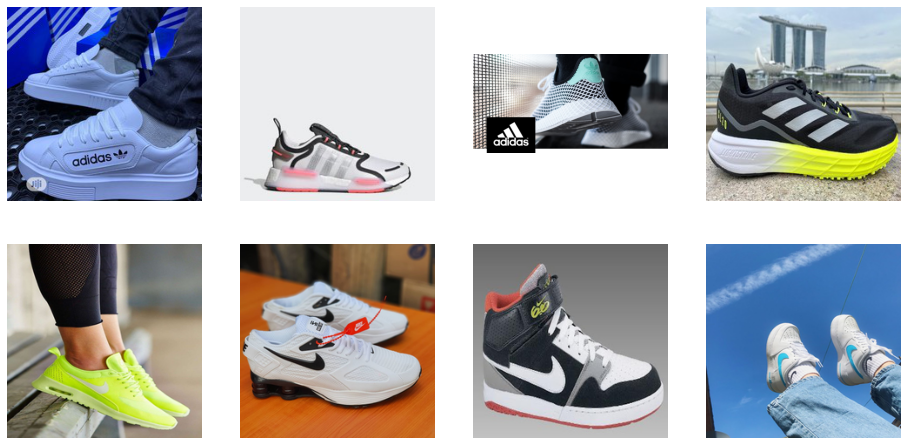

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 4
adidas_pix = [os.path.join(train_adidas, fname) 
                for fname in os.listdir(train_adidas)[pic_index-4:pic_index]]
nike_pix = [os.path.join(train_nike, fname) 
                for fname in os.listdir(train_nike)[pic_index-4:pic_index]]

for i, img_path in enumerate(adidas_pix+nike_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [23]:
lb = LabelEncoder()
trainY = lb.fit_transform(trainY)
valY = lb.fit_transform(valY)

In [24]:
print('Train min=%.f, max=%.f' % (trainX.min(), trainX.max()))
print('Validation min=%.f, max=%.f' % (valX.min(), valX.max()))

Train min=0, max=255
Validation min=0, max=255


In [25]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [26]:
train_iterator = datagen.flow(trainX, trainY, batch_size=64)
val_iterator = datagen.flow(valX, valY, batch_size=64)
print('Batches train=%d, validation=%d' % (len(train_iterator), len(val_iterator)))

Batches train=7, validation=3


In [27]:
batchX, batchy = train_iterator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(64, 150, 150, 3), min=0.000, max=1.000




---



## **MODELING**

In [46]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import os
import zipfile
import shutil
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, AveragePooling2D, GlobalAveragePooling2D, MaxPool2D, Flatten
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dropout, SpatialDropout2D, BatchNormalization

In [29]:
# build a simple model
model = Sequential()
model.add(InputLayer(input_shape=[150, 150, 3]))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(SpatialDropout2D(rate=0.5))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(SpatialDropout2D(rate=0.5))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(SpatialDropout2D(rate=0.5))
model.add(BatchNormalization())
model.add(Flatten())

# fully connected
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 spatial_dropout2d_3 (Spatia  (None, 150, 150, 32)     0         
 lDropout2D)                                                     
                                                                 
 batch_normalization_3 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        18496     
                                                      

In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
H = model.fit(train_iterator, epochs=26, validation_data=val_iterator)

Epoch 1/26
7/7 [==============================] - 46s 7s/step - loss: 0.3172 - accuracy: 0.8786 - val_loss: 0.7935 - val_accuracy: 0.6303
Epoch 2/26
7/7 [==============================] - 37s 5s/step - loss: 0.2916 - accuracy: 0.8501 - val_loss: 0.8006 - val_accuracy: 0.6061
Epoch 3/26
7/7 [==============================] - 35s 5s/step - loss: 0.2981 - accuracy: 0.8941 - val_loss: 0.7145 - val_accuracy: 0.6485
Epoch 4/26
7/7 [==============================] - 37s 5s/step - loss: 0.1969 - accuracy: 0.9070 - val_loss: 0.6816 - val_accuracy: 0.7091
Epoch 5/26
7/7 [==============================] - 35s 5s/step - loss: 0.2167 - accuracy: 0.9147 - val_loss: 0.8299 - val_accuracy: 0.6485
Epoch 6/26
7/7 [==============================] - 35s 5s/step - loss: 0.2131 - accuracy: 0.9173 - val_loss: 0.6359 - val_accuracy: 0.7152
Epoch 7/26
7/7 [==============================] - 37s 5s/step - loss: 0.2220 - accuracy: 0.8966 - val_loss: 0.6859 - val_accuracy: 0.6727
Epoch 8/26
7/7 [==================

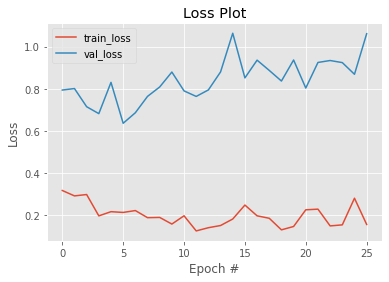

In [43]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 26), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 26), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

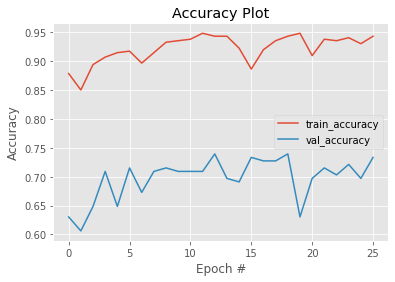

In [44]:
# plotting accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 26), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, 26), H.history["val_accuracy"], label="val_accuracy")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [55]:
model.save("Model.h5")

In [47]:
# build a simple model
model = Sequential()
model.add(InputLayer(input_shape=[150, 150, 3]))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(SpatialDropout2D(rate=0.5))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(SpatialDropout2D(rate=0.5))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(SpatialDropout2D(rate=0.5))
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())
model.add(Flatten())

# fully connected
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 spatial_dropout2d_7 (Spatia  (None, 150, 150, 32)     0         
 lDropout2D)                                                     
                                                                 
 batch_normalization_7 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 average_pooling2d (AverageP  (None, 75, 75, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                      

In [48]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
H = model.fit(train_iterator, epochs=26, validation_data=val_iterator)

Epoch 1/26
7/7 [==============================] - 27s 4s/step - loss: 0.7225 - accuracy: 0.4884 - val_loss: 0.6957 - val_accuracy: 0.4848
Epoch 2/26
7/7 [==============================] - 29s 4s/step - loss: 0.7281 - accuracy: 0.5116 - val_loss: 0.6987 - val_accuracy: 0.4848
Epoch 3/26
7/7 [==============================] - 25s 4s/step - loss: 0.7473 - accuracy: 0.5116 - val_loss: 0.7002 - val_accuracy: 0.4848
Epoch 4/26
7/7 [==============================] - 25s 4s/step - loss: 0.7568 - accuracy: 0.5090 - val_loss: 0.6985 - val_accuracy: 0.4424
Epoch 5/26
7/7 [==============================] - 25s 4s/step - loss: 0.7305 - accuracy: 0.4599 - val_loss: 0.6985 - val_accuracy: 0.4545
Epoch 6/26
7/7 [==============================] - 25s 4s/step - loss: 0.7087 - accuracy: 0.5323 - val_loss: 0.6955 - val_accuracy: 0.5212
Epoch 7/26
7/7 [==============================] - 25s 4s/step - loss: 0.7178 - accuracy: 0.5168 - val_loss: 0.6912 - val_accuracy: 0.5212
Epoch 8/26
7/7 [==================

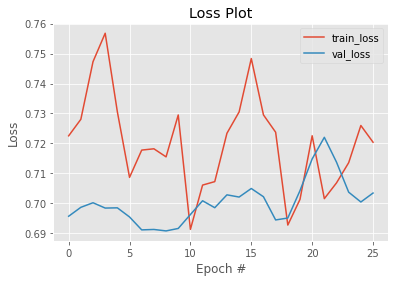

In [52]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 26), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 26), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

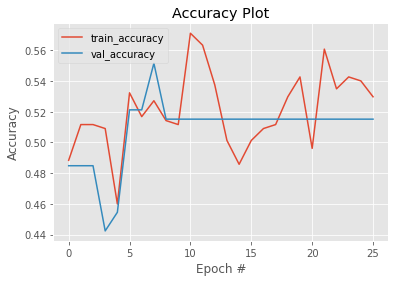

In [53]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 26), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, 26), H.history["val_accuracy"], label="val_accuracy")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [56]:
model.save("Model2.h5")